In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

Introduction:


An additional safety metric is misdemeanor offenses. Many misdemeanor offenses can be a threat to one's safety and they also can act as indicators of a neighborhoods demeanor. If a neighborhood appears "sketchy" a homeowner will most likely feel unsafe. 
 
The measure for implimenting misdeamors into our overall metric was the same as the other sub-metrics - counting to see which neighborhood had the most incidents.

In [3]:
data = pd.read_csv("https://data.wprdc.org/datastore/dump/6b11e87d-1216-463d-bbd3-37460e539d86", index_col="_id")

In [4]:
nhood = data['NEIGHBORHOOD']
counts = data['NEIGHBORHOOD'].value_counts()
counts

South Side Flats             3408
Central Business District    2000
Central Oakland               662
North Shore                   576
Carrick                       444
                             ... 
St. Clair                       3
Chartiers City                  3
Outside State                   2
Mt. Oliver Boro                 2
Outside County                  2
Name: NEIGHBORHOOD, Length: 97, dtype: int64

Showing Visusally

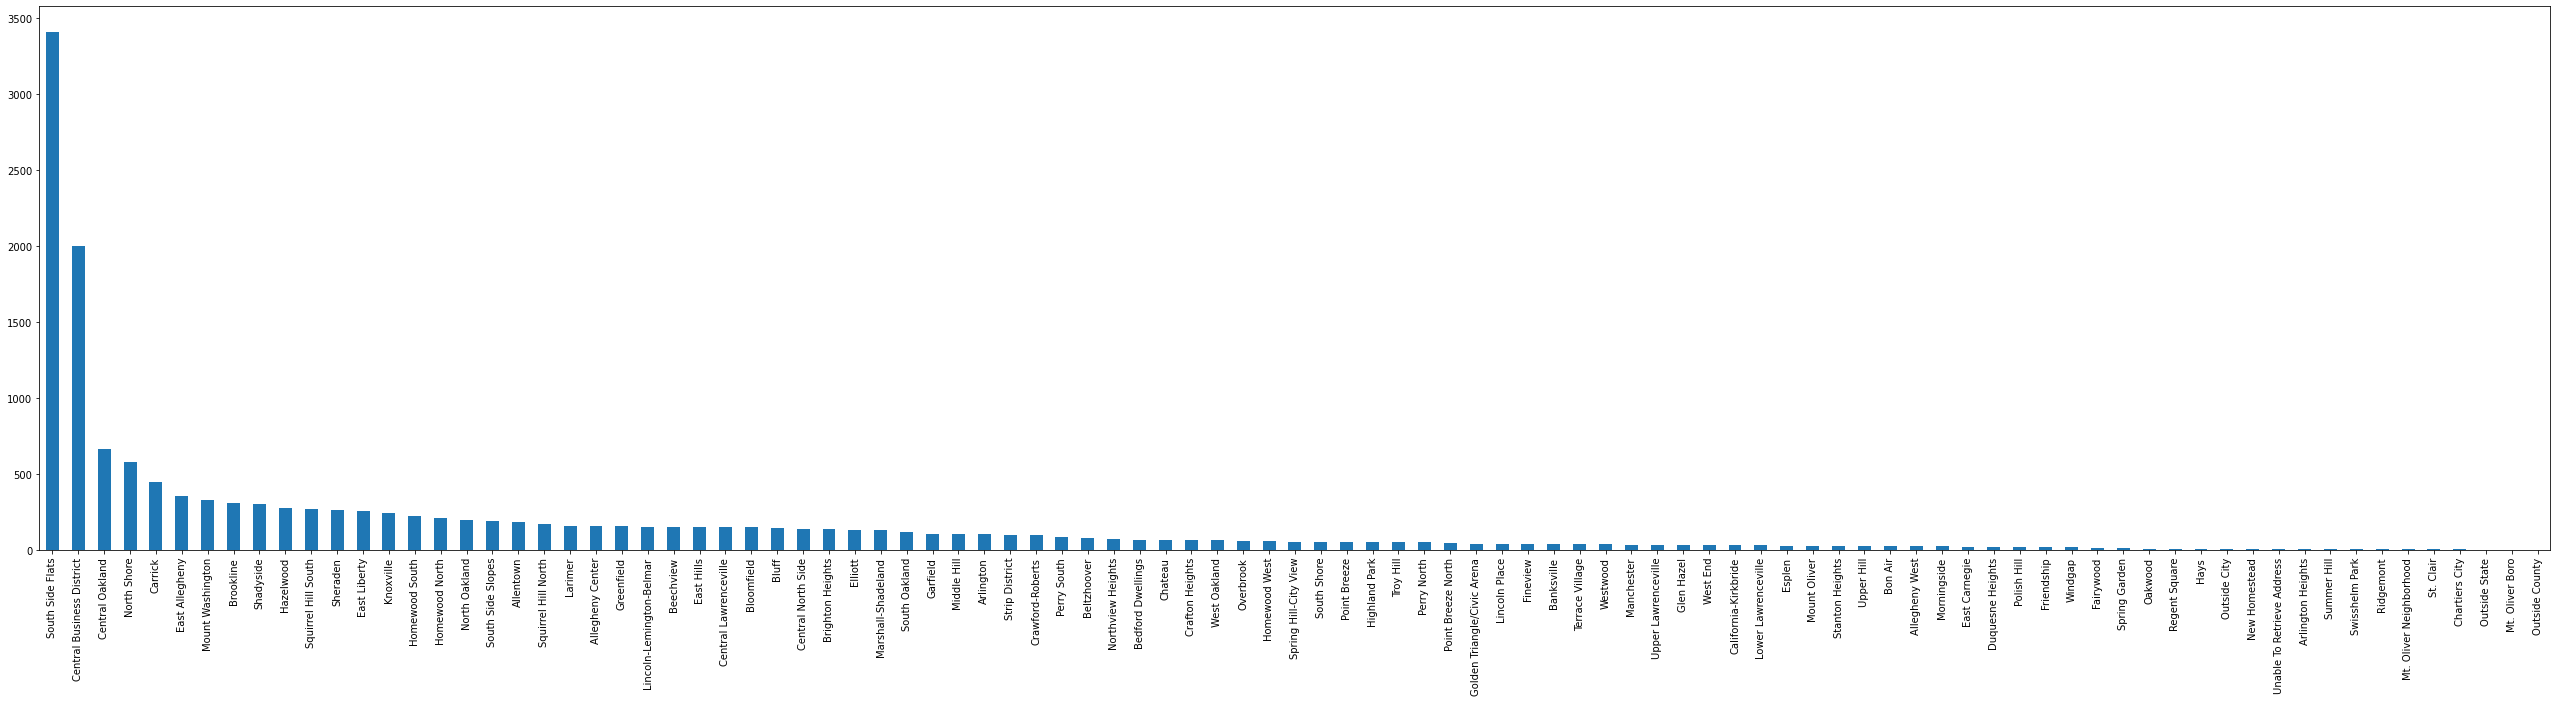

In [5]:
counts.plot.bar(figsize=(45,10))

Best: Mt.Oliver boro
Worst: South Side

In [6]:
import pandas as pd
import geopandas
%matplotlib inline

In [7]:
df = pd.DataFrame(data)

# Getting the value counts of neighborhoods
neighborhood_value_counts = df['NEIGHBORHOOD'].value_counts()
counts.columns = ['Neighborhood', 'Value_Count']
print(neighborhood_value_counts)

South Side Flats             3408
Central Business District    2000
Central Oakland               662
North Shore                   576
Carrick                       444
                             ... 
St. Clair                       3
Chartiers City                  3
Outside State                   2
Mt. Oliver Boro                 2
Outside County                  2
Name: NEIGHBORHOOD, Length: 97, dtype: int64


In [8]:

numCit = neighborhood_value_counts.groupby("Neighborhood").sum()['Value_Count']
numCit_sorted = numCit.sort_values(ascending=False)

print(numCit_sorted)

KeyError: 'Neighborhood'

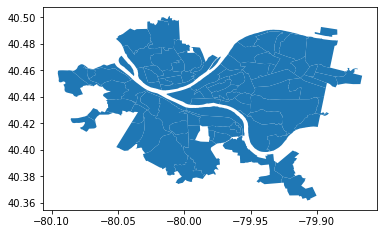

In [9]:
neighborhoods = geopandas.read_file("Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe

In [10]:

citMap = neighborhoods.merge(counts, how='left', left_on='hood', right_on= nhood)
steps_map.plot(column='number_of_steps')

KeyError: _id
1              North Oakland
2              North Oakland
3           Allegheny Center
4             Homewood South
5        Upper Lawrenceville
                ...         
26032                    NaN
26033                    NaN
26034               Sheraden
26035           East Liberty
26036           East Liberty
Name: NEIGHBORHOOD, Length: 15792, dtype: object

In [11]:
print(neighborhoods.columns.tolist())
print(data.columns.tolist())

['geometry']
['PK', 'CCR', 'GENDER', 'RACE', 'AGE', 'CITEDTIME', 'INCIDENTLOCATION', 'OFFENSES', 'NEIGHBORHOOD', 'ZONE', 'INCIDENTTRACT', 'COUNCIL_DISTRICT', 'PUBLIC_WORKS_DIVISION', 'X', 'Y']


In [12]:
steps_map.plot(column= counts, # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Citations"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

NameError: name 'steps_map' is not defined